<a href="https://colab.research.google.com/github/dimidagd/gists/blob/main/saliency_maps_based_on_attention_mass_thresholding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# How to implement attention maps as in DINO paper

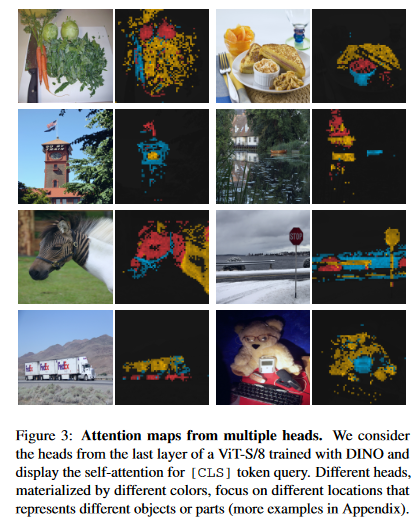

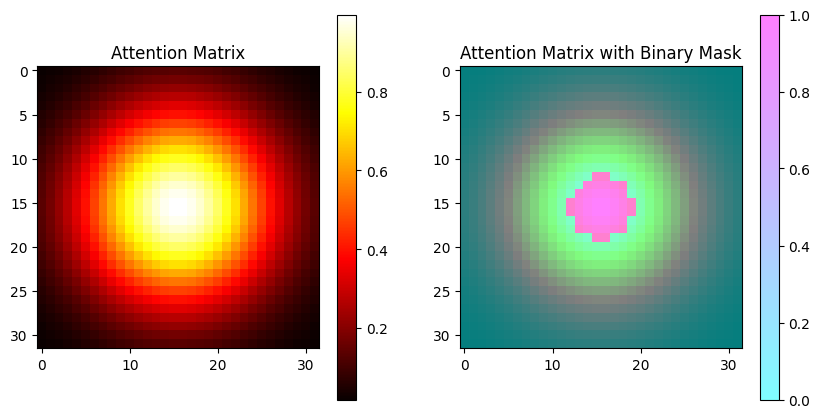

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian_blob(H, W, sigma=1.0):
    """
    Create a tensor with a Gaussian blob of high values in the center.

    Parameters:
    H (int): Height of the tensor.
    W (int): Width of the tensor.
    sigma (float): Standard deviation of the Gaussian.

    Returns:
    numpy.ndarray: A HxW tensor with a Gaussian blob in the center.
    """
    # Create coordinate grids
    x = np.linspace(-1, 1, W)
    y = np.linspace(-1, 1, H)
    x, y = np.meshgrid(x, y)

    # Create the Gaussian blob
    gaussian = np.exp(-(x**2 + y**2) / (2 * sigma**2))

    return gaussian

def keep_mass_percentage(array, percentage):
    """
    Keep X% of the mass of an HxW array.

    Parameters:
    array (numpy.ndarray): The input HxW array.
    percentage (float): The percentage of the mass to keep (between 0 and 100).

    Returns:
    numpy.ndarray: A binary mask of the same shape as the input array.
    """
    assert 0 <= percentage <= 100, "Percentage must be between 0 and 100"

    # Flatten the array and sort it
    flat_array = array.flatten()
    sorted_indices = np.argsort(flat_array)[::-1]  # Indices of sorted array in descending order
    sorted_array = flat_array[sorted_indices]

    # Compute the total mass and the threshold mass
    total_mass = np.sum(sorted_array)
    threshold_mass = total_mass * (percentage / 100.0)

    # Find the threshold value
    cumulative_sum = np.cumsum(sorted_array)
    threshold_index = np.searchsorted(cumulative_sum, threshold_mass)
    threshold_value = sorted_array[threshold_index]

    # Create the binary mask
    binary_mask = array >= threshold_value

    return binary_mask

# Generate attention matrix
H, W = 32, 32
sigma = 0.5
attention_matrix = gaussian_blob(H, W, sigma)

# Generate binary mask keeping 60% of mass
percentage = 10
binary_mask = keep_mass_percentage(attention_matrix, percentage)

# Plot the attention matrix
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(attention_matrix, cmap='hot', interpolation='nearest')
plt.title('Attention Matrix')
plt.colorbar()

# Plot the binary mask
plt.subplot(1, 2, 2)
plt.imshow(attention_matrix, cmap='hot', interpolation='nearest')
plt.imshow(binary_mask, cmap='cool', alpha=0.5, interpolation='nearest')
plt.title('Attention Matrix with Binary Mask')
plt.colorbar()
plt.show()